# Exponential growth model example

Discrete time model

$N_{t+1} = N_t + R N_t$

Continuous time model

$\frac{dN}{dt} = r N$

The two models give similar results when $R = e^r - 1$

In [64]:
from scipy.integrate import solve_ivp
import numpy as np
from tools import iterate
import ipywidgets as ipy
import matplotlib.pylab as plt

In [65]:
# Define model

def exp_discrete(n, R):
    return n + R * n

def exp_continuous(t, n, r):
    return r * n

In [83]:
init = 0.2 #initial population density
time_series = np.linspace(0, 100, 100)
r = 0.1
R = 0.1 # Lets try the value R = e^r - 1 
# simulation for continuous time model
pop_continuous = solve_ivp(exp_continuous, [0, 100], [init], 
                           t_eval=time_series, args=(r,))

# simulation for discrete time model
t_discrete, pop_discrete = iterate(exp_discrete, init, time_series[-1], R)

# set figure size
figure_size = (15, 7)

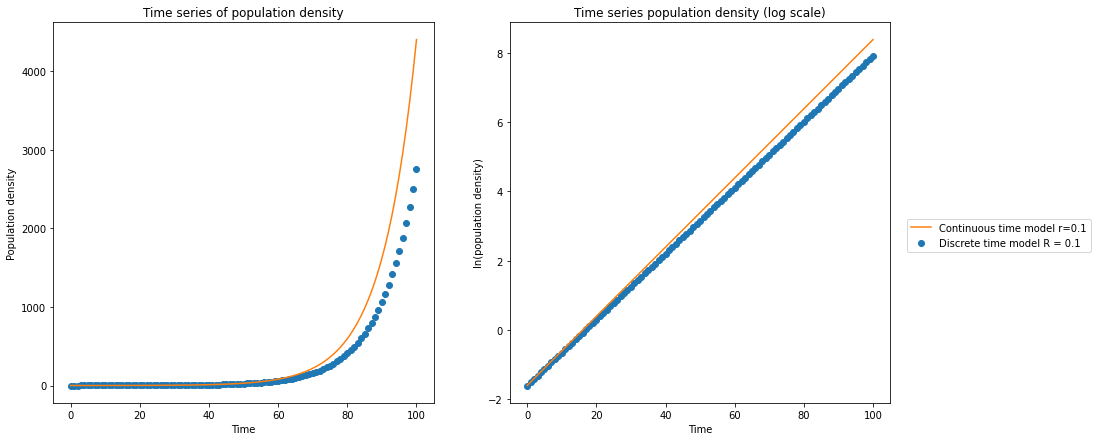

In [84]:
fig, axes = plt.subplots(1, 2, figsize=figure_size)
axes[0].plot(pop_continuous.t, pop_continuous.y[0], 
             label='Continuous time model r=0.1', c='C1')
axes[0].scatter(t_discrete, pop_discrete, label='Discrete time model R = 0.1')
axes[0].set(xlabel='Time', ylabel='Population density', title='Time series of population density')
axes[1].plot(pop_continuous.t, np.log(pop_continuous.y[0]), c='C1')
axes[1].scatter(t_discrete, np.log(pop_discrete))
axes[1].set(xlabel='Time', ylabel='ln(population density)', 
            title='Time series population density (log scale)')
fig.legend(bbox_to_anchor=(0.59, 0.4, 0.5, 0.1))


# Interactive graph


In [115]:
# Code to produce interactive figures
time_series = np.linspace(0, 100, 100)

# Create function for interactive plot
def plot_interactive(R_val, r_val):
    pc = solve_ivp(exp_continuous, [0, 100], [0.2], 
                t_eval=time_series, args=(r_val,))
    td, pd = iterate(exp_discrete, 0.2, time_series[-1], R_val)
    fig, axes = plt.subplots(1, 2, figsize=figure_size)
    axes[0].plot(pc.t, pc.y[0], label=f'r = {r_val}', c='C1')
    axes[0].scatter(td, pd, label=fr'R = {R_val}, $e^r - 1$ = {np.exp(r_val) - 1}')
    axes[0].set(xlabel='Time', ylabel = 'Population density', 
                title='Time series of population density', ylim=(0, 20))
    axes[1].plot(pc.t, np.log(pc.y[0]), c='C1')
    axes[1].scatter(td, np.log(pd))
    axes[1].set(xlabel='Time', ylabel = 'Population density', 
                title='Time series of population density (log scale)', ylim=(-2, 3))
    fig.legend(bbox_to_anchor=(0.2, 0.6, 0.1, 0.4))

In [117]:
ipy.interact(plot_interactive, R_val=(0.001, 0.1, 1e-7), 
            r_val=(0.001, 0.1, 1e-7))

interactive(children=(FloatSlider(value=0.050499999999999996, description='R_val', max=0.1, min=0.001, step=1e…

<function __main__.plot_interactive(R_val, r_val)>